# WHOIS requests on the first URL of each quote

## 0 Needed packages and functions

### 0.1 Importing needed packages

In [52]:
import numpy as np
import pandas as pd
import bz2
import json
import seaborn as sns
import matplotlib.pyplot as plt
from whois import whois
from tqdm import tqdm
tqdm.pandas()

### 0.2 Function to perform WHOIS request

In [2]:
def tryandget(url):
    try:
        who= whois(url)
        return [who.org, who.country, who.state, who.city]
    except:
        pass
    return [None, None, None, None]

### 0.3 Plots format

In [58]:
# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 14,
                     'figure.figsize':(20,7)})

## 1 Data preparation for request

### 1.1 Reading sample data

In [3]:
df= pd.read_json("/Users/nicolasantacroce/Desktop/Desktop/EPFL/EPFL MA1/Applied Data Analysis/Sample.json.bz2",compression="bz2",lines=True)

### 1.2 Extracting domains from urls

In [4]:
df["domain"]= df['urls'].apply(lambda x: "/".join(x[0].split('/',3)[:3]))

### 1.3 Creating a dataframe of unique domains

In [5]:
df_domain= pd.DataFrame(df.value_counts("domain")).reset_index()
df_domain= df_domain.rename(columns={0: "count"})
df_domain.describe()

,count
count,26582.000000
mean,47.543074
std,163.114553
min,1.000000
25%,1.000000
50%,7.000000
75%,34.000000
max,5220.000000


## 2 Getting WHOIS informations

### 2.1 Performing WHOIS requests on domains (takes a lot of time)

In [ ]:
df_domain[["org","country","state","city"]]= df_domain["domain"].apply(lambda x: pd.Series(tryandget(x)))

### 2.2 Saving domain dataframe to pickle format

In [ ]:
df_domain.to_pickle("./whois_result.pkl")
df_domain.head(10)

## 3 Joining WHOIS info to sample data

### 3.1 Loading domain dataframe from pickle

In [6]:
df_domain= pd.read_pickle("./whois_result.pkl")
df_domain.head(10)

,domain,count,org,country,state,city
0,http://www.breitbart.com,5220,"Domains By Proxy, LLC",US,Arizona,Tempe
1,http://www.msn.com,4505,Microsoft Corporation,US,WA,Redmond
2,http://home.nzcity.co.nz,4372,None,None,None,None
3,http://www.stuff.co.nz,3766,None,None,None,None
4,https://www.thesun.co.uk,3726,None,None,None,None
5,http://msn.com,3649,Microsoft Corporation,US,WA,Redmond
6,http://express.co.uk,3487,None,None,None,None
7,http://mlb.mlb.com,3189,"MLB Advanced Media, LP",US,NY,New York
8,http://thehill.com,3142,None,US,FL,Jacksonville
9,https://www.seattletimes.com,3012,SEATTLE TIMES COMPANY,US,WA,SEATTLE


### 3.2 Joining sample data and domain data frame

In [9]:
df= df.join(df_domain.set_index('domain'), on='domain')
del df["count"]
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domain,org,country,state,city
0,2015-11-11-109291,They'll call me lots of different things. Libe...,Chris Christie,[Q63879],2015-11-11 00:55:12,1,"[[Chris Christie, 0.7395], [Bobby Jindal, 0.15...",[http://thehill.com/blogs/ballot-box/259760-ch...,E,http://thehill.com,None,US,FL,Jacksonville
1,2015-11-04-105046,"The choices are not that easy,",Dr. John,"[Q511074, Q54593093]",2015-11-04 18:13:06,2,"[[Dr. John, 0.5531], [None, 0.4469]]",[http://delawareonline.com/story/news/health/2...,E,http://delawareonline.com,"Gannett Co., Inc.",US,VA,None
2,2015-09-11-070666,It's kind of the same way it's been with the R...,Niklas Kronwall,[Q722939],2015-09-11 19:54:00,1,"[[Niklas Kronwall, 0.7119], [None, 0.2067], [H...",[http://redwings.nhl.com/club/news.htm?id=7787...,E,http://redwings.nhl.com,REDACTED FOR PRIVACY,US,NY,REDACTED FOR PRIVACY
3,2015-01-12-082489,"We're now going back to the frozen tundra, and...",Frances McDormand,[Q204299],2015-01-12 01:40:00,3,"[[Frances McDormand, 0.484], [None, 0.4495], [...",[http://feeds.people.com/~r/people/headlines/~...,E,http://feeds.people.com,Meredith Corporation,US,IA,Des Moines
4,2015-11-09-033345,I had a chuckle: They were showing a video of ...,Kris Draper,[Q948695],2015-11-09 00:57:45,3,"[[Kris Draper, 0.8782], [None, 0.1043], [Serge...",[http://ca.rd.yahoo.com/sports/rss/nfl/SIG=13u...,E,http://ca.rd.yahoo.com,None,None,None,None


## 4 Exploring retrieved metadata representativity

### 4.1 Registered organisations 

*Number of retrieved organisations names*

In [49]:
df_org= df_domain[["org","count"]][df_domain["org"].apply(lambda x: isinstance(x, str))].groupby(["org"]).sum().sort_values(["count"], ascending=False).reset_index()
num_unique_org= len(df_org)
print("Number of unique organisations : {}".format(num_unique_org))

Number of unique organisations : 1794


*20 Most cited organisations in the sample data*

[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered Organisation')]

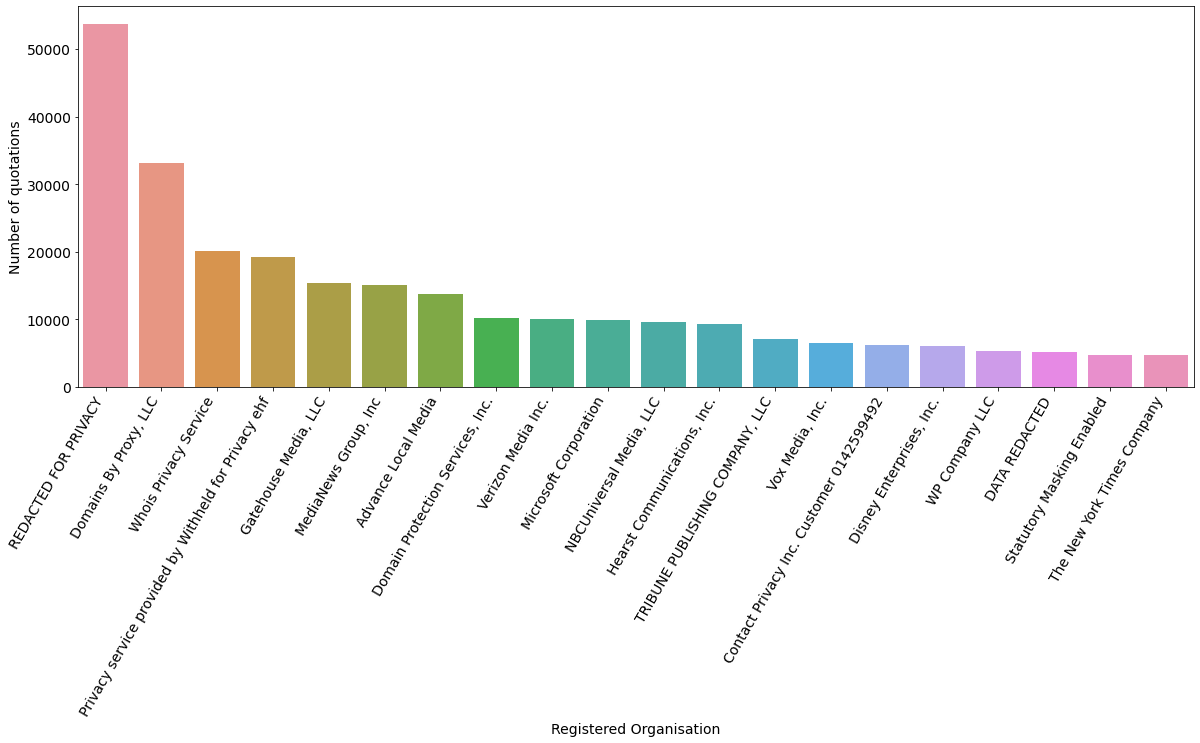

In [66]:
ax = sns.barplot(x="org", y="count",data=df_org[:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered Organisation")

### 4.2 Countries

*Number of retrieved countries*

In [69]:
df_country= df_domain[["country","count"]][df_domain["country"].apply(lambda x: isinstance(x, str))].groupby(["country"]).sum().sort_values(["count"], ascending=False).reset_index()
num_unique_country= len(df_country)
print("Number of unique countries : {}".format(num_unique_country))

Number of unique countries : 96


*20 Most cited countries in the sample data*

[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered Country')]

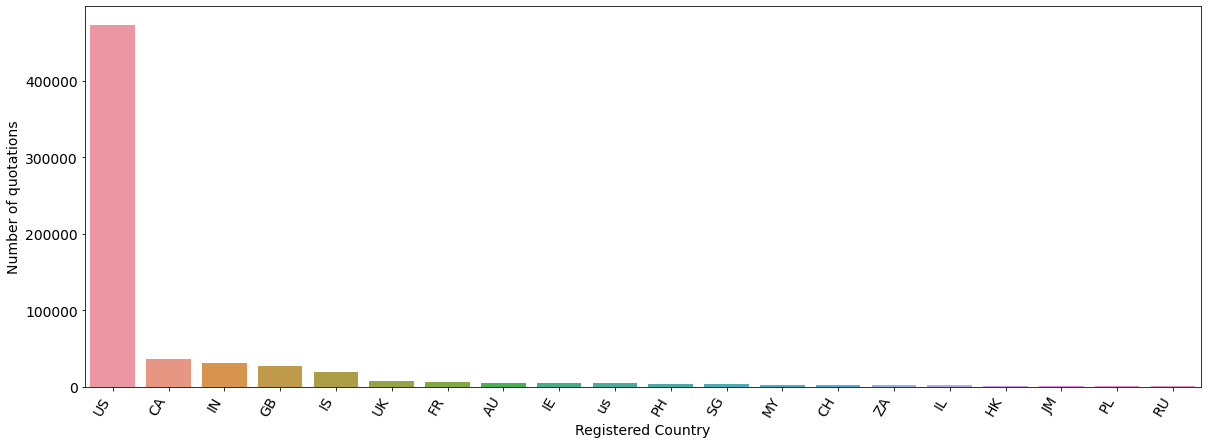

In [70]:
ax = sns.barplot(x="country", y="count",data=df_country[:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered Country")

*As US is by far the most common origin, we remove it and plot countries again to have a better visualisation of the following countries*

[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered Country')]

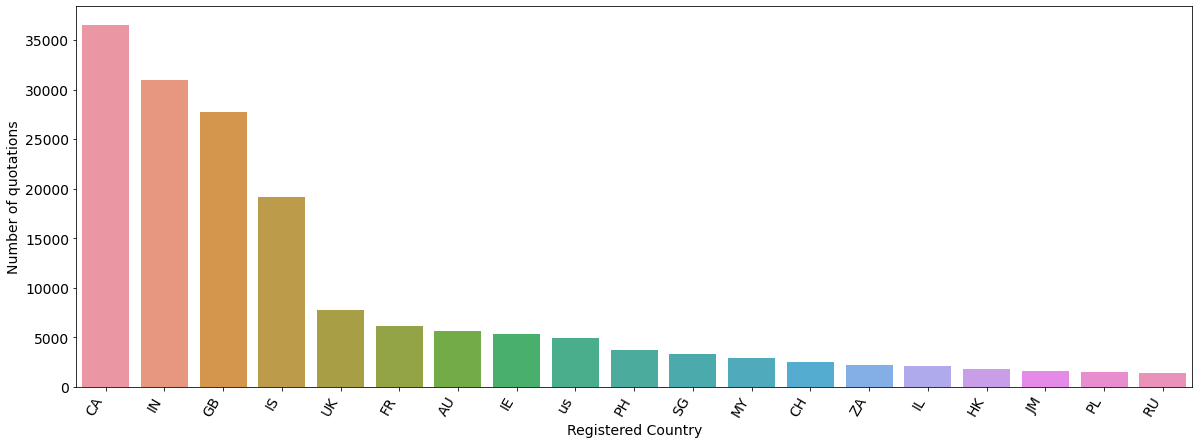

In [71]:
ax = sns.barplot(x="country", y="count",data=df_country[1:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered Country")

### 4.3 States

*Number of retrieved states*

In [72]:
df_state= df_domain[["state","count"]][df_domain["state"].apply(lambda x: isinstance(x, str))].groupby(["state"]).sum().sort_values(["count"], ascending=False).reset_index()
num_unique_state= len(df_state)
print("Number of unique states : {}".format(num_unique_state))

Number of unique states : 420


*20 Most cited states in the sample data*

[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered State')]

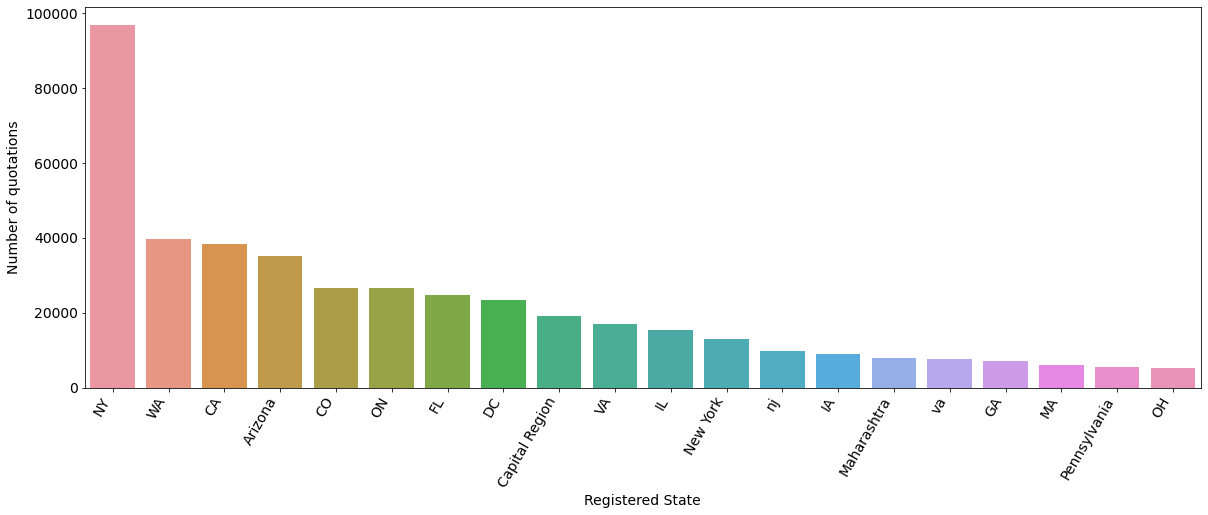

In [75]:
ax = sns.barplot(x="state", y="count",data=df_state[:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered State")

### 4.4 Cities

*Number of retrieved citites*

In [77]:
df_city= df_domain[["city","count"]][df_domain["city"].apply(lambda x: isinstance(x, str))].groupby(["city"]).sum().sort_values(["count"], ascending=False).reset_index()
num_unique_city= len(df_city)
print("Number of unique cities : {}".format(num_unique_city))

Number of unique cities : 309


*20 Most cited cities in the sample data*

[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered City')]

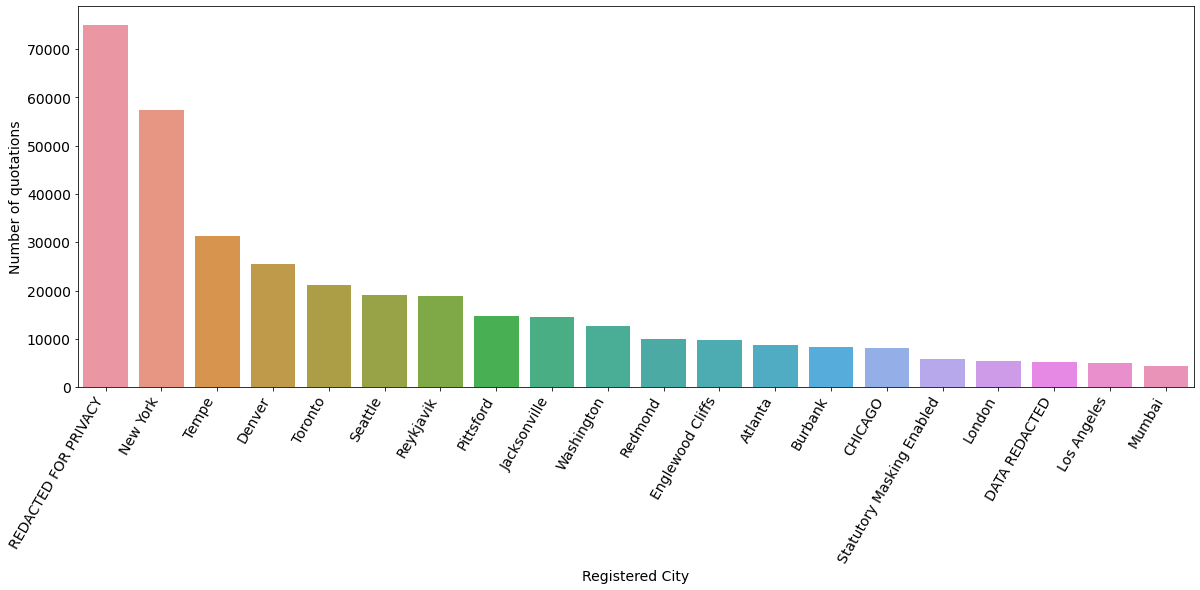

In [78]:
ax = sns.barplot(x="city", y="count",data=df_city[:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered City")